In [1]:
## Tutorial Overview
# 1. Iterative Imputation
# 2. Horse Colic Dataset
# Iterative Imputation with IterativeImputer

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Checking the number of percentage of missing values 
dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

print(dataframe.shape)

for i in range(dataframe.shape[1]):
    nm_miss = dataframe[[i]].isnull().sum()
    
    pec_miss = nm_miss/dataframe.shape[0] * 100
    
    print('>%d Missing count : %d (%.3f)'%(i,nm_miss,pec_miss))

(300, 28)
>0 Missing count : 1 (0.333)
>1 Missing count : 0 (0.000)
>2 Missing count : 0 (0.000)
>3 Missing count : 60 (20.000)
>4 Missing count : 24 (8.000)
>5 Missing count : 58 (19.333)
>6 Missing count : 56 (18.667)
>7 Missing count : 69 (23.000)
>8 Missing count : 47 (15.667)
>9 Missing count : 32 (10.667)
>10 Missing count : 55 (18.333)
>11 Missing count : 44 (14.667)
>12 Missing count : 56 (18.667)
>13 Missing count : 104 (34.667)
>14 Missing count : 106 (35.333)
>15 Missing count : 247 (82.333)
>16 Missing count : 102 (34.000)
>17 Missing count : 118 (39.333)
>18 Missing count : 29 (9.667)
>19 Missing count : 33 (11.000)
>20 Missing count : 165 (55.000)
>21 Missing count : 198 (66.000)
>22 Missing count : 1 (0.333)
>23 Missing count : 0 (0.000)
>24 Missing count : 0 (0.000)
>25 Missing count : 0 (0.000)
>26 Missing count : 0 (0.000)
>27 Missing count : 0 (0.000)


### IterativeImputer

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

print('Total Missing count:%d'%(np.sum(np.isnan(X))))

#imputer = IterativeImputer(estimator=BayesianRidge(),n_nearest_features=None,imputation_order="ascending" )

imputer = IterativeImputer()
imputer.fit(X)

Xtran =  imputer.transform(X)

print('Total Missing count:%d'%(np.sum(np.isnan(Xtran))))

Total Missing count:1605
Total Missing count:0


### Iterative Imputation and Model Evaluation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

#print(y)
print('Total Missing count:%d'%(np.sum(np.isnan(X))))

imputer = IterativeImputer()
model = RandomForestClassifier()

pipeline = Pipeline([('impute',imputer),('model',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Model Accuracy : %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Total Missing count:1605
Model Accuracy : 0.812 (0.058)


### Iterative Imputation with different Imputation Order

Total Missing count:1605
Model ascending Accuracy : 0.804 (0.071)
Model descending Accuracy : 0.812 (0.066)
Model random Accuracy : 0.809 (0.054)
Model arabic Accuracy : 0.811 (0.064)
Model roman Accuracy : 0.816 (0.065)


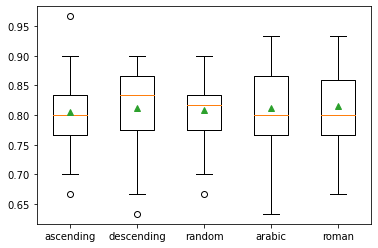

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

#print(y)
print('Total Missing count:%d'%(np.sum(np.isnan(X))))

results = []
strategies = ['ascending','descending','random','arabic','roman']

for s in strategies:
    

    imputer = IterativeImputer(imputation_order=s)
    model = RandomForestClassifier()

    pipeline = Pipeline([('impute',imputer),('model',model)])

    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

    scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

    print("Model %s Accuracy : %.3f (%.3f)"%(s ,np.mean(scores),np.std(scores)))
    
    results.append(scores)

plt.boxplot(results,labels=strategies,showmeans=True)
plt.show()

### Imputer with different number of iterations

Total Missing count:1605
Model 1 Accuracy : 0.809 (0.071)
Model 2 Accuracy : 0.811 (0.065)
Model 3 Accuracy : 0.806 (0.067)
Model 4 Accuracy : 0.819 (0.063)
Model 5 Accuracy : 0.801 (0.065)
Model 6 Accuracy : 0.808 (0.069)
Model 7 Accuracy : 0.803 (0.062)
Model 8 Accuracy : 0.803 (0.071)
Model 9 Accuracy : 0.806 (0.063)
Model 10 Accuracy : 0.809 (0.068)
Model 11 Accuracy : 0.811 (0.070)
Model 12 Accuracy : 0.804 (0.073)
Model 13 Accuracy : 0.814 (0.075)
Model 14 Accuracy : 0.793 (0.071)
Model 15 Accuracy : 0.801 (0.074)
Model 16 Accuracy : 0.802 (0.058)
Model 17 Accuracy : 0.808 (0.059)
Model 18 Accuracy : 0.808 (0.065)
Model 19 Accuracy : 0.800 (0.069)
Model 20 Accuracy : 0.812 (0.061)


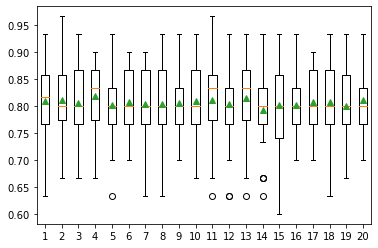

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

#print(y)
print('Total Missing count:%d'%(np.sum(np.isnan(X))))

results = []
strategies = [str(i) for i in range(1,21)]

for s in strategies:
    

    imputer = IterativeImputer(max_iter=int(s))
    model = RandomForestClassifier()

    pipeline = Pipeline([('impute',imputer),('model',model)])

    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

    scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

    print("Model %s Accuracy : %.3f (%.3f)"%(s ,np.mean(scores),np.std(scores)))
    
    results.append(scores)

plt.boxplot(results,labels=strategies,showmeans=True)
plt.show()

### Iterative Imputer Transform while making prediction

In [14]:
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

#print(y)
print('Total Missing count:%d'%(np.sum(np.isnan(X))))

imputer = IterativeImputer()
model = RandomForestClassifier()

pipeline = Pipeline([('impute',imputer),('model',model)])

pipeline.fit(X,y)

yhat = pipeline.predict([row])

print("predicted class is ", yhat[0])

Total Missing count:1605
predicted class is  2.0
